In [1]:
import numpy as np
import pandas as pf
from sklearn.datasets import load_digits

In [2]:
X, y = load_digits(return_X_y=True, as_frame=True)
print(X.shape, y.shape)

(1797, 64) (1797,)


In [3]:
y.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

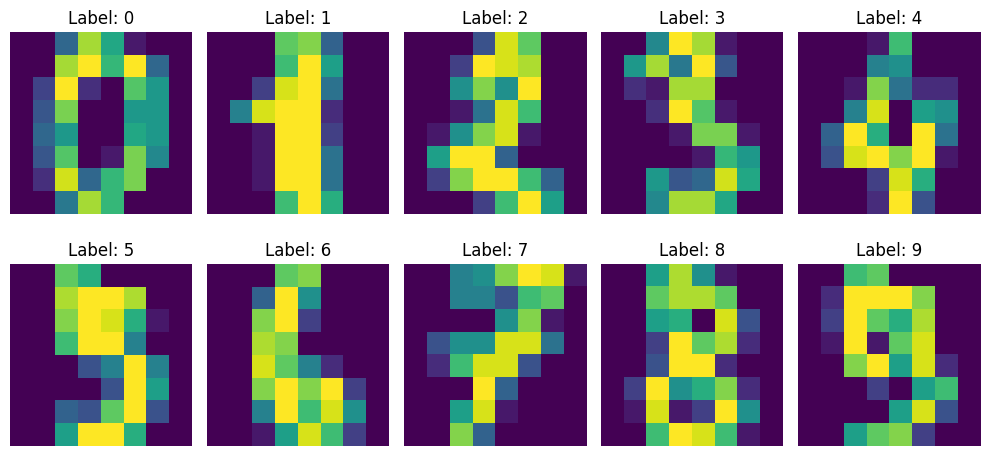

In [4]:
import matplotlib.pyplot as plt
#show top 10 images in the dataset in grid format
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X.iloc[i].values.reshape(8,8))
    ax.set_title(f"Label: {y.iloc[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
lro = LogisticRegression(multi_class='ovr', max_iter=5000)
lrm = LogisticRegression(multi_class='multinomial', max_iter=5000)
#Fitting OVR model
lro.fit(X_train, y_train)
y_pred = lro.predict(X_test)
#Fitting Multinomial model
lrm.fit(X_train, y_train)
y_pred_m = lrm.predict(X_test)

/Users/ankitpokhrel/Downloads/All_projects/ML_Projects/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/ankitpokhrel/Downloads/All_projects/ML_Projects/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [8]:
#import classification_metrices
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [9]:
#Metrices for OVR model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("----------------------------------------------------------------------")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("----------------------------------------------------------------------")
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  1  0  0 45  1  0  0  0]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  2  0  0  0  1  0  0 27  0]
 [ 0  0  0  0  0  0  0  0  3 37]]
----------------------------------------------------------------------

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.90      1.00      0.95        28
           2       0.97      1.00      0.99        33
           3       1.00      0.97      0.99        34
           4       1.00      0.98      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.90      0.90      0.90        30
           9 

In [10]:
#Metrices for Multinomial model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_m))
print("----------------------------------------------------------------------")
print("\nClassification Report:\n", classification_report(y_test, y_pred_m))
print("----------------------------------------------------------------------")
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_m))

Confusion Matrix:
 [[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  1 38]]
----------------------------------------------------------------------

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.92      0.96      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9 

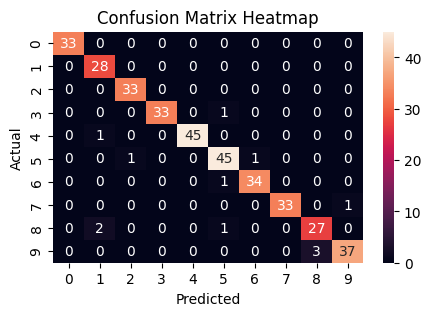

In [11]:
#Classification metric in detailed view for OVR model
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

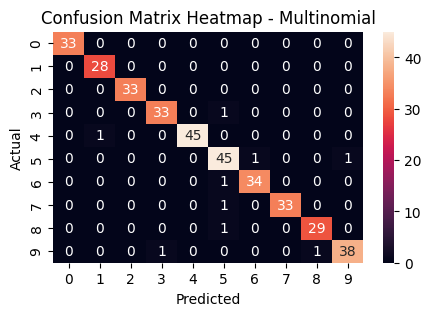

In [12]:
#Classification metric in detailed view for Multinomial model
conf_matrix_m = confusion_matrix(y_test, y_pred_m)
plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix_m, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap - Multinomial')
plt.show()

In [13]:
!pip install ipycanvas

/Users/ankitpokhrel/Downloads/All_projects/ML_Projects/myenv/bin/pip: line 2: /Users/ankitpokhrel/Downloads/All projects/ML Projects/myenv/bin/python3.12: No such file or directory
/Users/ankitpokhrel/Downloads/All_projects/ML_Projects/myenv/bin/pip: line 2: exec: /Users/ankitpokhrel/Downloads/All projects/ML Projects/myenv/bin/python3.12: cannot execute: No such file or directory


### This is Vibecoded but works fine and I have tested it!!

In [14]:
# Interactive Drawing Canvas for Digit Recognition
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from ipycanvas import Canvas, hold_canvas
from ipywidgets import interact, VBox, HBox, Button, Output, HTML
import cv2
from PIL import Image
import io

# Load and prepare the model
X, y = load_digits(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

print("Model trained successfully!")
print(f"Training accuracy: {model.score(X_train_scaled, y_train):.3f}")
print(f"Test accuracy: {model.score(X_test_scaled, y_test):.3f}")

Model trained successfully!
Training accuracy: 0.999
Test accuracy: 0.972


In [15]:
# Create the interactive drawing canvas
class DigitDrawingWidget:
    def __init__(self, model, scaler):
        self.model = model
        self.scaler = scaler
        self.canvas = Canvas(width=40, height=40, sync_image_data=True)
        self.canvas.fill_style = 'white'
        self.canvas.fill_rect(0, 0, 40, 40)
        
        self.output = Output()
        self.prediction_display = HTML(value="<p><b>Draw a digit and click Predict!</b></p>")
        
        # Buttons
        self.clear_button = Button(description='Clear Canvas', button_style='info')
        self.predict_button = Button(description='Predict Digit', button_style='success')
        
        # Bind events
        self.canvas.on_mouse_down(self.on_mouse_down)
        self.canvas.on_mouse_move(self.on_mouse_move)
        self.canvas.on_mouse_up(self.on_mouse_up)
        self.clear_button.on_click(self.clear_canvas)
        self.predict_button.on_click(self.predict_digit)
        
        self.drawing = False
        
    def on_mouse_down(self, x, y):
        self.drawing = True
        self.draw_point(x, y)
        
    def on_mouse_move(self, x, y):
        if self.drawing:
            self.draw_point(x, y)
    
    def on_mouse_up(self, x, y):
        self.drawing = False
            
    def draw_point(self, x, y):
        with hold_canvas(self.canvas):
            self.canvas.fill_style = 'black'
            # Draw a 3x3 brush centered on the click point for better visibility
            self.canvas.fill_rect(x-1, y-1, 3, 3)
    
    def clear_canvas(self, button):
        with hold_canvas(self.canvas):
            self.canvas.fill_style = 'white'
            self.canvas.fill_rect(0, 0, 40, 40)
        self.prediction_display.value = "<p><b>Draw a digit and click Predict!</b></p>"
    
    def predict_digit(self, button):
        # Get image data from canvas
        image_data = np.array(self.canvas.get_image_data())
        
        # Convert RGBA to grayscale
        if len(image_data.shape) == 3 and image_data.shape[2] == 4:
            # Convert from RGBA to RGB first, then to grayscale
            rgb_image = image_data[:, :, :3]
            gray_image = np.dot(rgb_image, [0.299, 0.587, 0.114])
        else:
            gray_image = image_data
        
        # Invert colors (black on white to white on black like training data)
        gray_image = 255 - gray_image
        
        # Resize to 8x8 like the training data
        resized_image = cv2.resize(gray_image, (8, 8), interpolation=cv2.INTER_AREA)
        
        # Normalize to 0-16 range like the original digits dataset
        normalized_image = (resized_image / 255.0 * 16).astype(np.float64)
        
        # Flatten to 1D array
        flattened_image = normalized_image.flatten().reshape(1, -1)
        
        # Scale using the same scaler used for training
        scaled_image = self.scaler.transform(flattened_image)
        
        # Make prediction
        prediction = self.model.predict(scaled_image)[0]
        probabilities = self.model.predict_proba(scaled_image)[0]
        confidence = np.max(probabilities) * 100
        
        # Display result
        result_html = f"""
        <p><b>Prediction: <span style='color: blue; font-size: 1.5em;'>{prediction}</span></b> ({confidence:.1f}%)</p>
        <div style='font-family: monospace; font-size: 0.8em;'>
        """
        
        for digit, prob in enumerate(probabilities):
            if prob > 0.01:  # Only show probabilities > 1%
                bar_width = int(prob * 50)  # Smaller bars
                result_html += f"<div>{digit}: {'█' * bar_width} {prob:.2f}</div>"
        
        result_html += "</div>"
        self.prediction_display.value = result_html
    
    def get_widget(self):
        buttons = HBox([self.clear_button, self.predict_button])
        return VBox([
            HTML("<h4 style='margin: 5px 0;'>Digit Recognition</h4>"),
            self.canvas,
            buttons,
            self.prediction_display
        ])

# Create and display the widget
drawing_widget = DigitDrawingWidget(model, scaler)
drawing_widget.get_widget()

In [16]:
# Save the model and scaler for deployment
import pickle
import os

# Create char_reco directory if it doesn't exist
os.makedirs('char_reco', exist_ok=True)

# Save the model
with open('char_reco/digit_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the scaler
with open('char_reco/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Model and scaler saved successfully!")
print("Files created:")
print("- char_reco/digit_model.pkl")
print("- char_reco/scaler.pkl")

Model and scaler saved successfully!
Files created:
- char_reco/digit_model.pkl
- char_reco/scaler.pkl
